# Исследование рынка продаж игр

В вашем распоряжении данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности.
Необходимо спланировать компанию по продаже игр на 2017 год на основе имеющихся данных.

<b>Шаг 1. Откройте файл с данными и изучите общую информацию</b>

Путь к файлу: /datasets/games.csv. Скачать датасет  

<b>Шаг 2. Подготовьте данные</b>

 - Замените названия столбцов (приведите к нижнему регистру);
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
 - Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
 - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
 
<b>Шаг 3. Проведите исследовательский анализ данных</b>

 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
 
<b>Шаг 4. Составьте портрет пользователя каждого региона</b>

 Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
 
<b>Шаг 5. Проверьте гипотезы</b>

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - Задайте самостоятельно пороговое значение alpha.
 
Поясните:
 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.
 
<b>Шаг 6. Напишите общий вывод</b>


### Откройте файл с данными и изучите общую информацию. 

#### На первом этапе откроем файл и посмотрим первые 10 строк

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Просмотрим общую информацию о данных и построим гистограммы для понимания

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


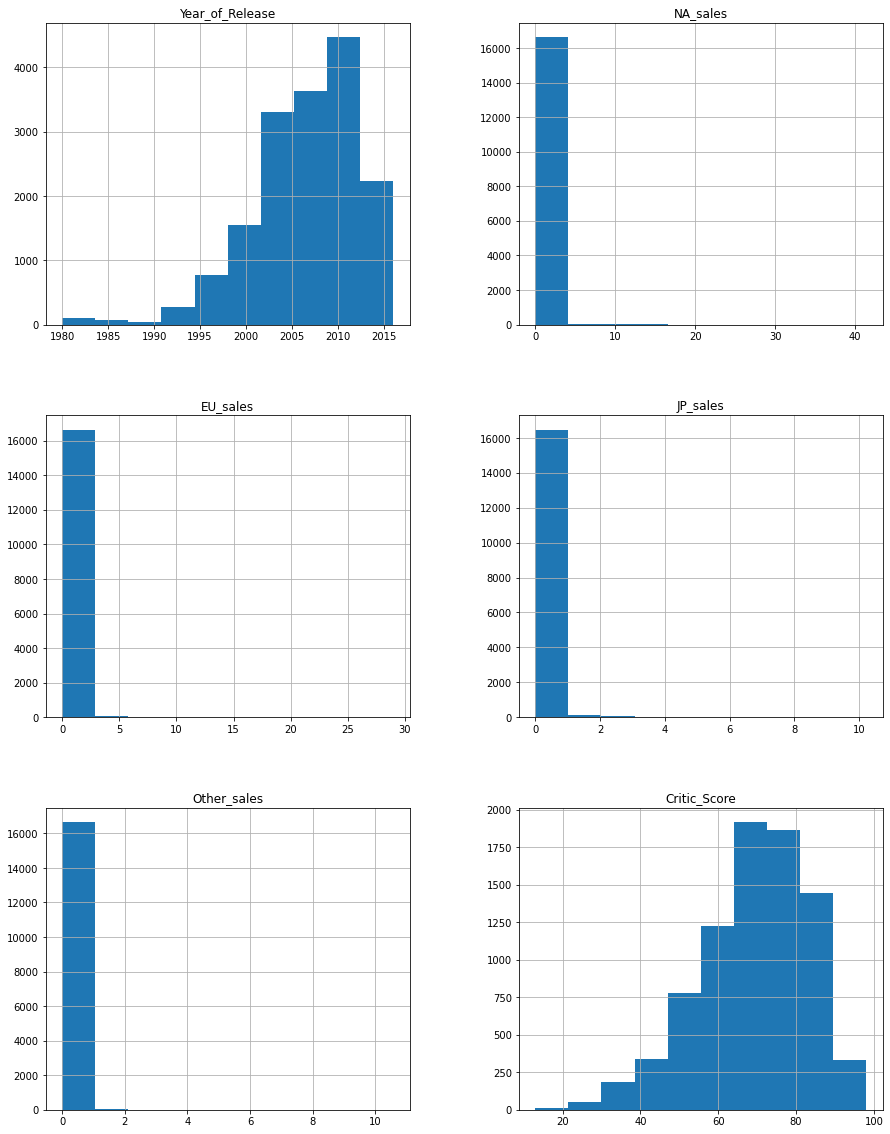

In [5]:
data.hist(figsize=(15, 20));

### Подготовьте данные. 

#### Перевод в нижний регистр заголовкаов столбцов

In [6]:
data.columns = [x.lower() for x in data.columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Определение пропущенных значений

In [8]:
#Поиск столбцов с пропущенными значениями и их кол-во
print(data.isna().sum()) # Получаем информацию с пропускками в столбцах
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') #Добавляем информирование по процентам пропусков с тепловым обозначением

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Удалим строки с неизвестными названиями игр и неизвестными датами выхода

In [9]:
data = data.dropna(subset=['name', 'year_of_release']) #Удаление сторк с пропусками в столбцах названия и года выпуска меньшк 2% от общего объема данных

Выполним проверку на явные дубликаты

In [10]:
data.duplicated().sum()

0

После выполненых действий выполняем проверку результата

In [11]:
#Поиск столбцов с пропущенными значениями и их кол-во
print(data.isna().sum()) # Получаем информацию с пропускками в столбцах
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') #Добавляем информирование по процентам пропусков с тепловым обозначением

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64


,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


**Вывод:** Оценки критиков, пользователей и рейтинг заменить по какой-либо закономерности нет возможности, так как использование среднего/медианного значения будет не корректным и исказит общую картину по результатам аналитики.

#### Изменяем (если можно и необходимо) типы данных

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int64') #Меняем тип для поля год релиза, год может быть только целым числом
#Обработаем значения tbd (должно быть оцененно) в поле оценка пользователей
data['user_score'] = data['user_score']. replace({'tbd': np.nan}) #Так как оценка еще не произвелась, то заменим значени на NaN
data['user_score'] = pd.to_numeric(data['user_score']) #Меняем тип данных на числовой

#### Добавление суммарного кол-ва продаж

In [13]:
data['all_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Проверка результатов всех выполненых действий

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [15]:
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


**Вывод:** Были изменены типы данных для двух столбцов: год релиза и оценка пользователей. Так же был добавлен столбец с суммой всех продаж для каждой игры.

In [16]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

In [17]:
data['rating'] = data['rating'].fillna('NO-INFO')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Проведите исследовательский анализ данных. 

#### Кол-во игр по годам

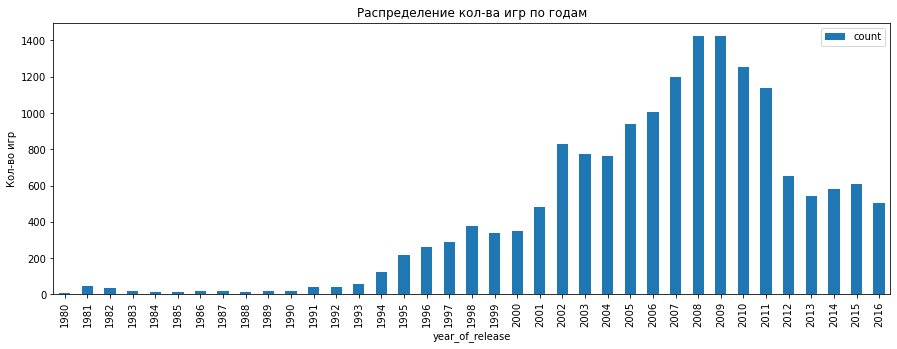

In [18]:
(data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
 .rename(columns={'name':'count'})
).plot(y='count', kind = 'bar', figsize = (15,5), ylabel = 'Кол-во игр', title = 'Распределение кол-ва игр по годам')
plt.show()

In [19]:
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').describe()

,name
count,37.000000
mean,444.432432
std,451.604334
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


**Вывод** Согласно полученным результатам можно удалить строки с датами выпуска игр до 1995 года так как их кол-во не значительно на общем фоне.

In [20]:
data=data.query('year_of_release > 1994')

Делаем проверку

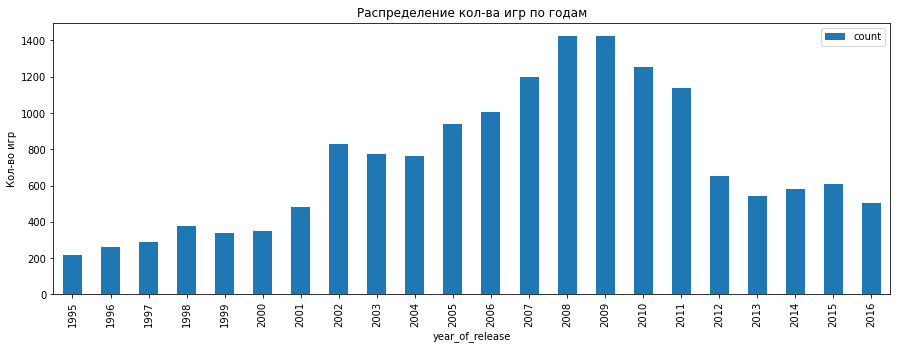

In [21]:
(data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
 .rename(columns={'name':'count'})
).plot(y='count', kind = 'bar', figsize = (15,5), ylabel = 'Кол-во игр', title = 'Распределение кол-ва игр по годам')
plt.show()

#### Распределение по платформам

In [22]:
#Посмотрим на все уникальные платформы
data['platform'].sort_values().unique()

array(['3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'N64', 'NG', 'PC',
       'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SNES',
       'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne'], dtype=object)

Построим диаграмму распределения выручки по платформам

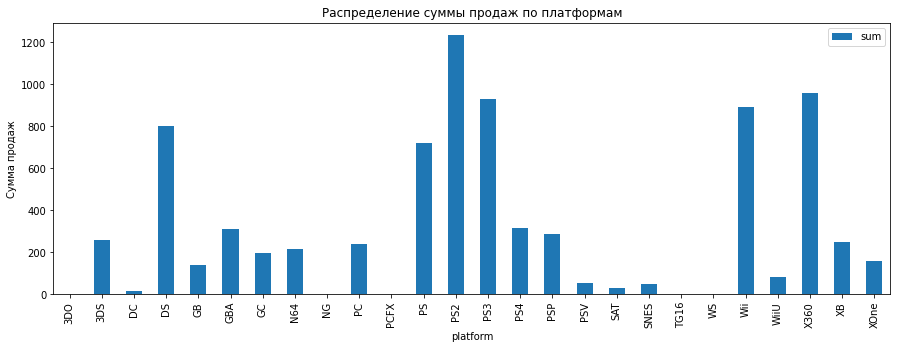

In [23]:
(data.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
 .rename(columns={'all_sales':'sum'})
).plot(y='sum', kind = 'bar', figsize = (15,5), ylabel = 'Сумма продаж', title = 'Распределение суммы продаж по платформам')
plt.show()

In [24]:
data.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').describe()

,all_sales
count,26.000000
mean,313.650385
std,364.780645
min,0.030000
25%,34.852500
50%,207.370000
75%,313.825000
max,1233.560000


**Вывод** Судя по данным можно удалить несколько платформа

In [25]:
data = data.query("platform !='3DO' & platform !='NG' & platform !='PCFX' & platform !='TG16' & platform !='WS'  & platform !='DC'")

Выполняем проверку после чистки

In [26]:
data['platform'].sort_values().unique()

array(['3DS', 'DS', 'GB', 'GBA', 'GC', 'N64', 'PC', 'PS', 'PS2', 'PS3',
       'PS4', 'PSP', 'PSV', 'SAT', 'SNES', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'], dtype=object)

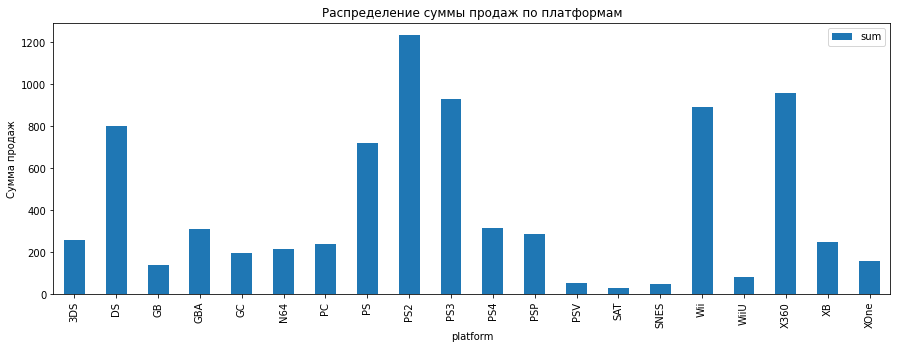

In [27]:
(data.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
 .rename(columns={'all_sales':'sum'})
).plot(y='sum', kind = 'bar', figsize = (15,5), ylabel = 'Сумма продаж', title = 'Распределение суммы продаж по платформам')
plt.show()

**Вывод** По результатам построенной диаграммы выберем следующие платформы: X360, Wii, PS3, PS2, PS, DS и построим по ним распределения по годам.

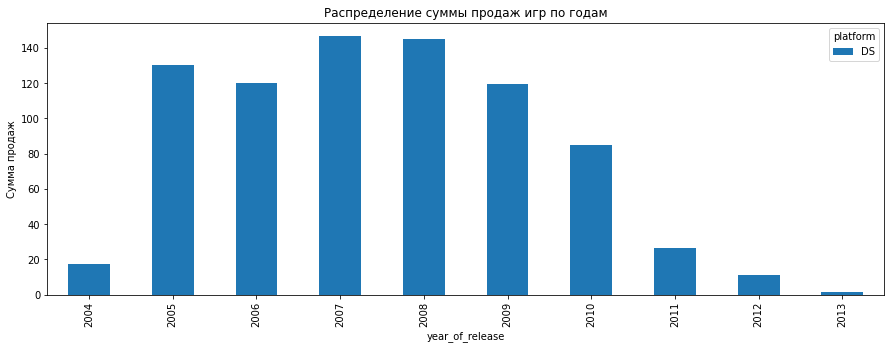

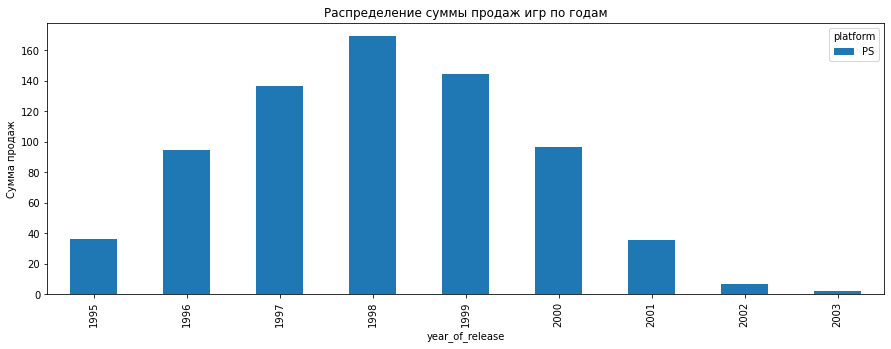

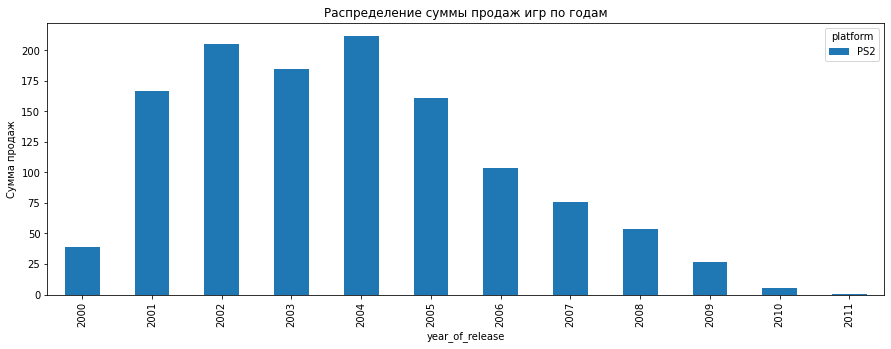

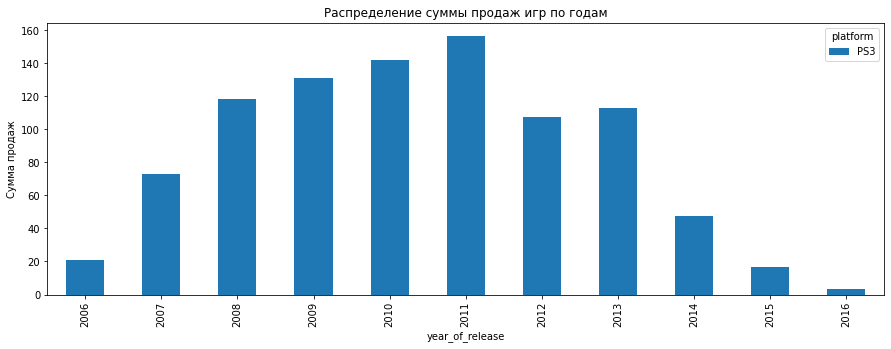

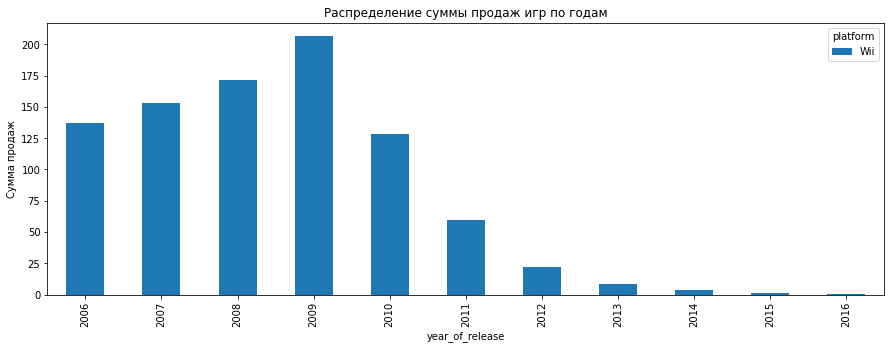

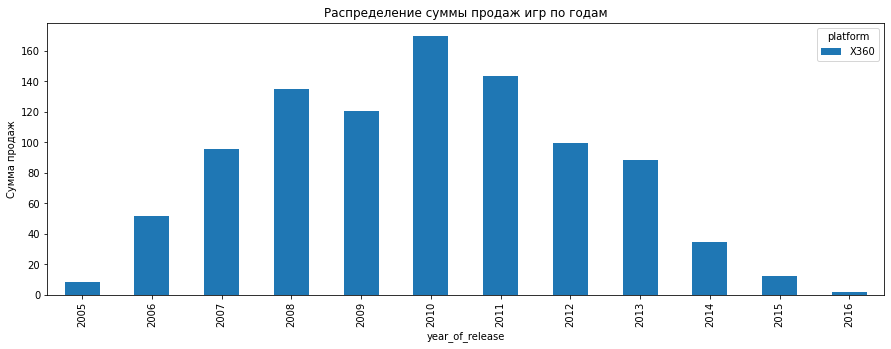

In [28]:
top_platforms = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']
for p in top_platforms:
    (data[data['platform'] == p]
     .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
     .plot(kind='bar', figsize = (15,5), ylabel = 'Сумма продаж', title = 'Распределение суммы продаж игр по годам'))

**Вывод:** Судя по графикам средний жизненный цикл для платформ 4-5 лет, соответственно для построения прогнозной модели на 2017 год логичнее отбросить все данные, которые ниже 2014 года.

#### Выбор данных только по актуальному периоду

In [29]:
data=data.query('year_of_release > 2013') # Оставляем данные только за 2014-2016 года

Построим диаграмму за 3 последних года по кол-ву игр

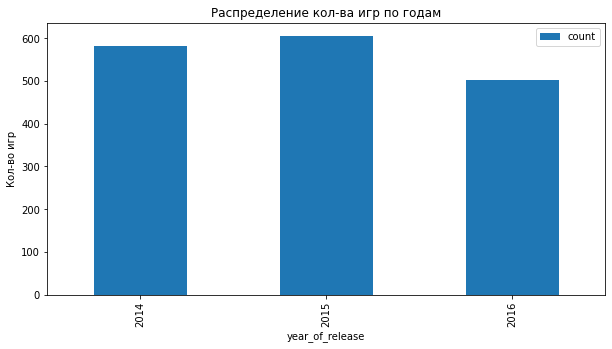

In [30]:
(data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
 .rename(columns={'name':'count'})
).plot(y='count', kind = 'bar', figsize = (10,5), ylabel = 'Кол-во игр', title = 'Распределение кол-ва игр по годам')
plt.show()

Построим диаграмму по заработанным деньгам по платформам за последние 3 года и выберем самые ходовые платформы

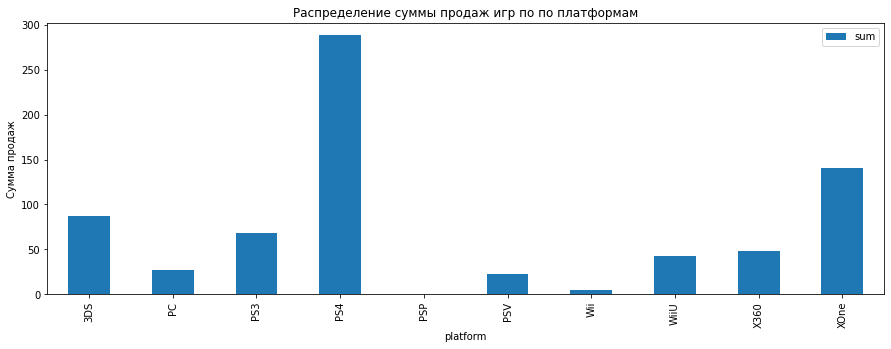

In [31]:
(data.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
 .rename(columns={'all_sales':'sum'})
).plot(y='sum', kind = 'bar', figsize = (15,5), ylabel = 'Сумма продаж', title = 'Распределение суммы продаж игр по по платформам')
plt.show()

Самыми популярными и прибыльными платформами являются PS4 и XOne

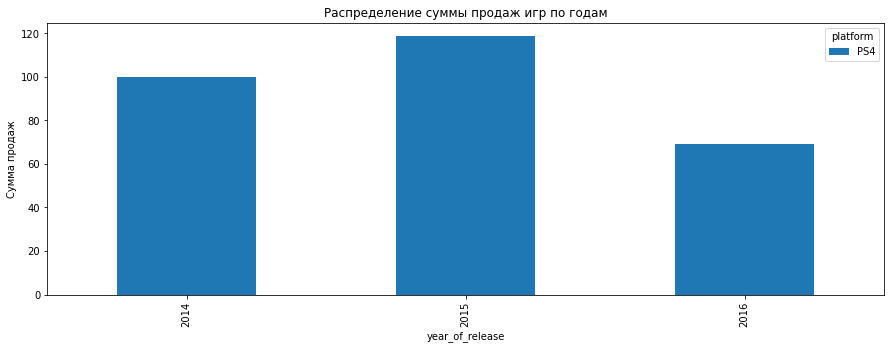

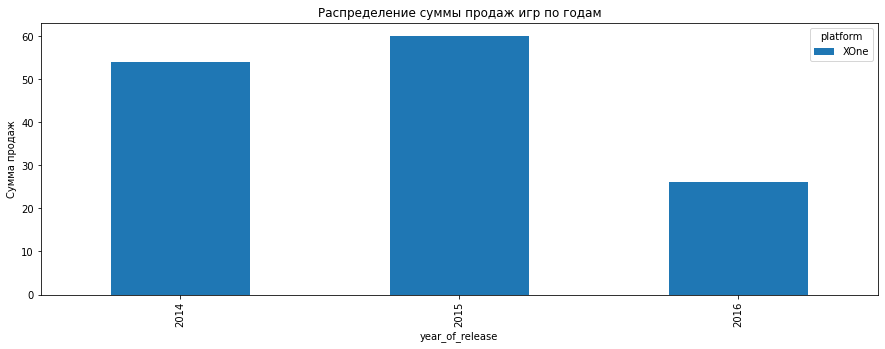

In [32]:
top_platforms = ['PS4', 'XOne']
for p in top_platforms:
    (data[data['platform'] == p]
     .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
     .plot(kind='bar', figsize = (15,5), ylabel = 'Сумма продаж', title = 'Распределение суммы продаж игр по годам'))

Построим диаграммы размаха для определения выбросов

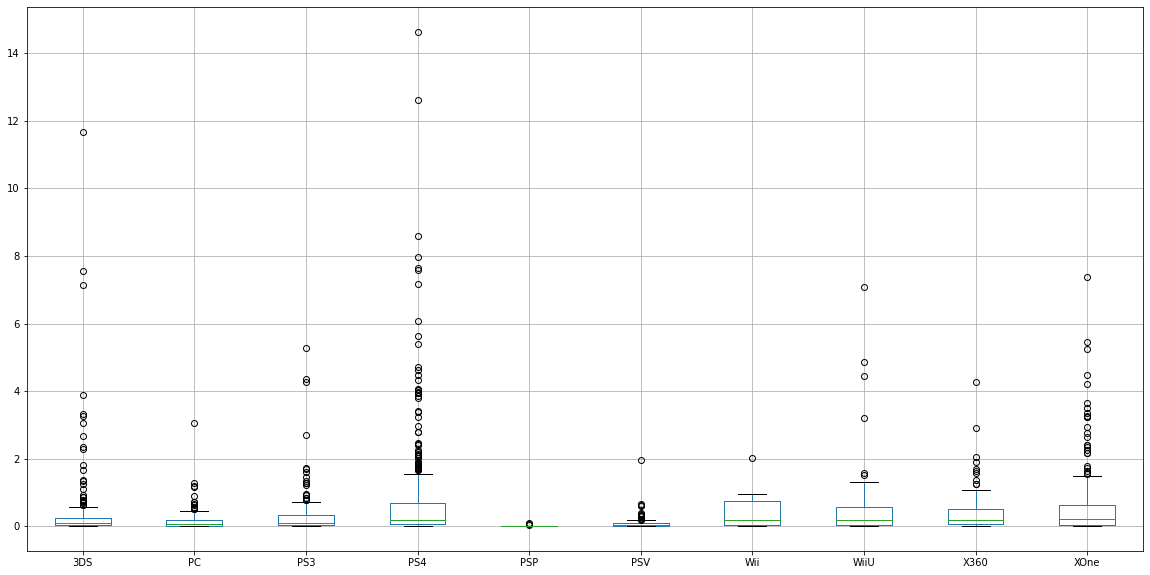

In [33]:
data.pivot_table(index='name', columns='platform', values = 'all_sales', aggfunc= 'sum').boxplot(grid=True, figsize=(20,10))
plt.show()

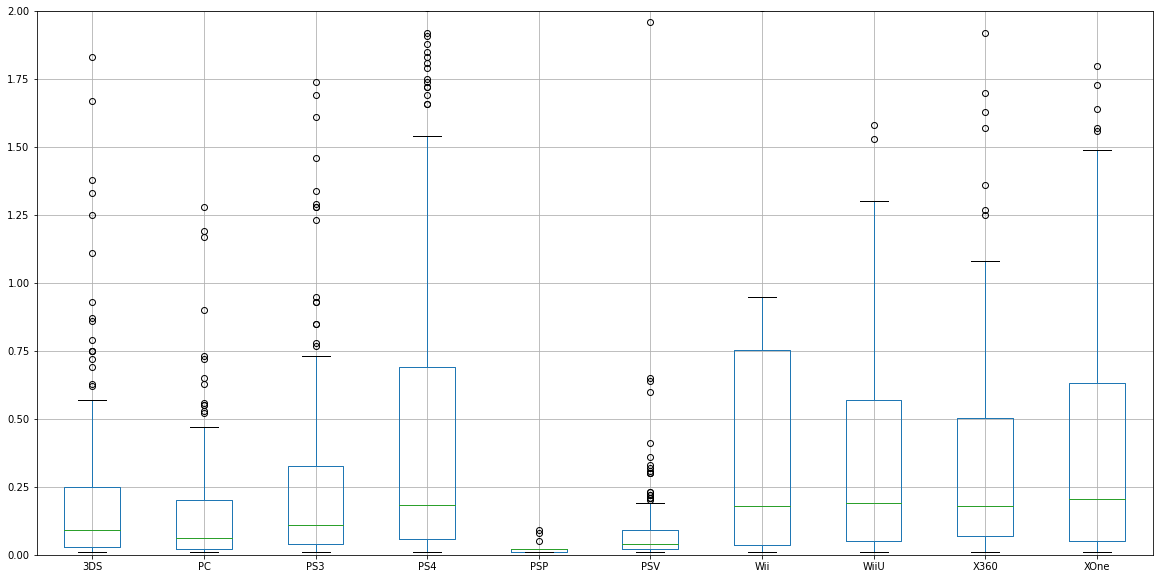

In [34]:
data.pivot_table(index='name', columns='platform', values = 'all_sales', aggfunc= 'sum').boxplot(grid=True, figsize=(20,10))
plt.ylim(0, 2)
plt.show()

In [35]:
top_platform =  ['PS4', 'XOne']
for plat in top_platform:
    print(plat)
    print(data[data['platform'] == plat]['all_sales'].corr(data['user_score']))
    print();

PS4
-0.040131589472697356

XOne
-0.0703839280647581



**Вывод:** Судя по коэффициенту корреляции Пирсона у нас имеется слабая отрицательная корреляция, которая почти равна 0, что означает что взаимосвязи между оценками пользователей и суммой продаж практически нет.

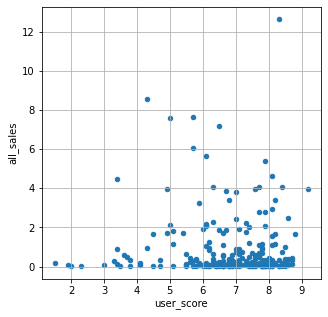

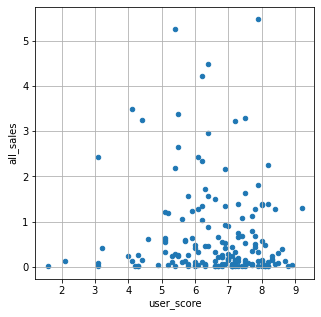

In [36]:
data[data['platform']=='PS4'].plot(x='user_score', y='all_sales', kind='scatter', figsize=(5,5), grid=True)
plt.show()
data[data['platform']=='XOne'].plot(x='user_score', y='all_sales', kind='scatter', figsize=(5,5), grid=True)
plt.show()

**Вывод:** Предыдущий вывод подтверждают и построенные диаграммы рассеяния, оценка не влияет на сумму.

Построим диаграммы рассеяния и посчитаем корреляцию по оставшимся платформам

In [37]:
data['platform'].sort_values().unique()

array(['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360',
       'XOne'], dtype=object)

In [38]:
any_platform =  ['3DS', 'PC', 'PS3', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360']
for plat in any_platform:
    print(plat)
    print(data[data['platform'] == plat]['all_sales'].corr(data['user_score']))
    print();

3DS
0.2151932718527028

PC
-0.07159665703472452

PS3
-0.16676141347662116

PSP
nan

PSV
-0.16845504978064446

Wii
1.0

WiiU
0.4079264579217078

X360
-0.138444570945665



3DS


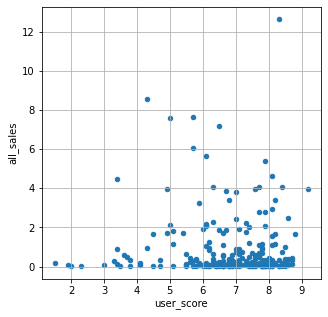

PC


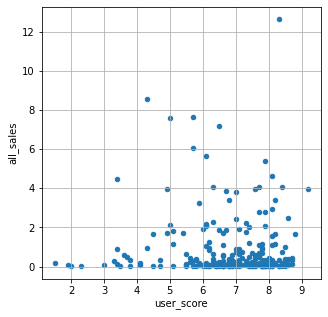

PS3


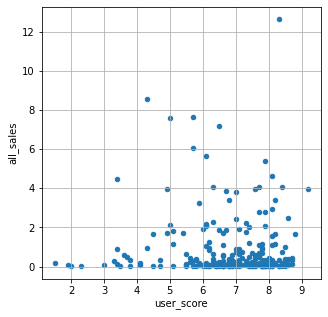

PSP


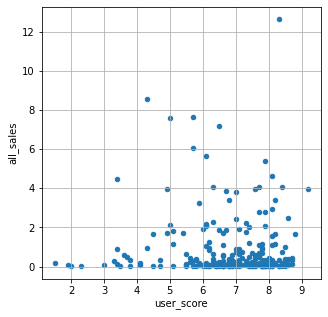

PSV


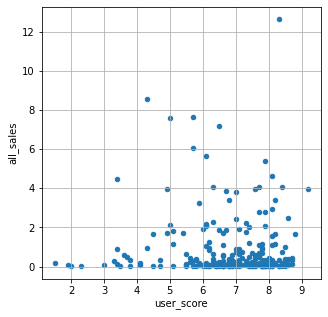

Wii


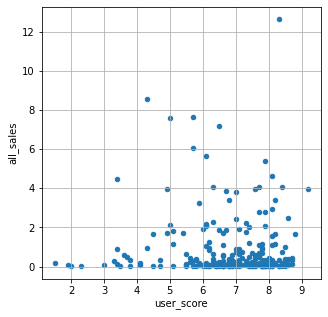

WiiU


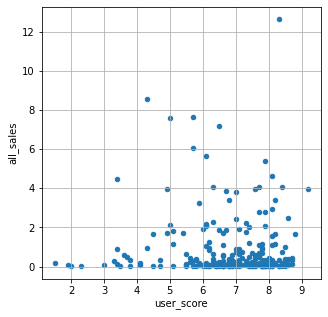

X360


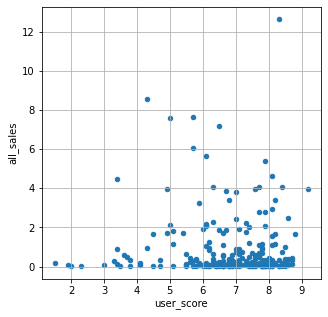

In [39]:
for plat in any_platform:
    print(plat)
    data[data['platform']=='PS4'].plot(x='user_score', y='all_sales', kind='scatter', figsize=(5,5), grid=True)
    plt.show()


**Вывод:** Согласно полученным результатам платформа Wii показала сильную взаимосвязанность оценок и сумм, так же для платформы WiiU есть слабая связь между оценкой и суммами продаж.

Для топ платформ

In [40]:
for plat in top_platform:
    print(plat)
    print(data[data['platform'] == plat]['all_sales'].corr(data['critic_score']))
    print();

PS4
0.40266141068104083

XOne
0.42867694370333226



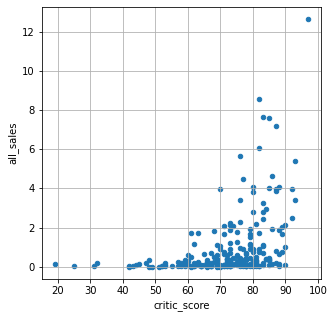

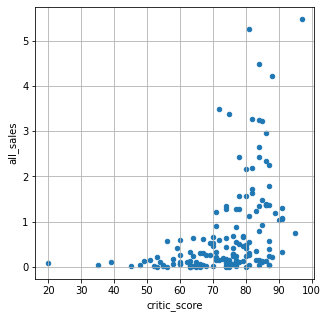

In [41]:
data[data['platform']=='PS4'].plot(x='critic_score', y='all_sales', kind='scatter', figsize=(5,5), grid=True)
plt.show()
data[data['platform']=='XOne'].plot(x='critic_score', y='all_sales', kind='scatter', figsize=(5,5), grid=True)
plt.show()

**Вывод:** Судя по коэффициенту корреляции Пирсона видно наличие связи между оценкой критиков и суммарными продажами, не такая сильная, но все же есть и диаграммы рассеивания это подтверждают.

Для остальных платформ

In [42]:
for plat in any_platform:
    print(plat)
    print(data[data['platform'] == plat]['all_sales'].corr(data['critic_score']))
    print();

3DS
0.31411749286905105

PC
0.17463413769350036

PS3
0.44657460493190704

PSP
nan

PSV
0.04266490657009526

Wii
nan

WiiU
0.370201412480884

X360
0.5257228356581523



3DS


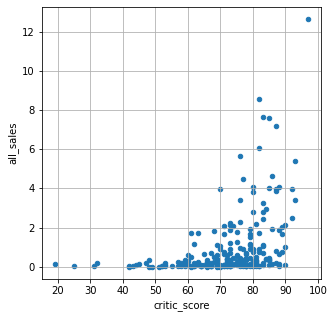

PC


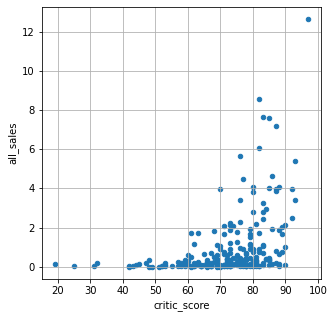

PS3


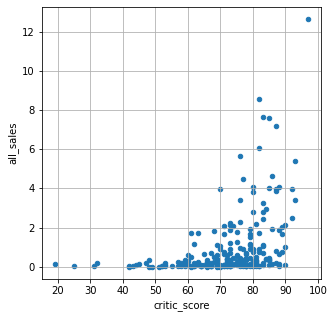

PSP


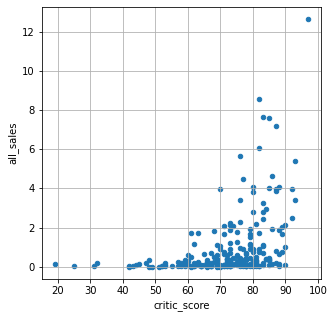

PSV


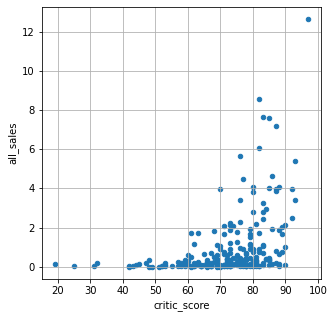

Wii


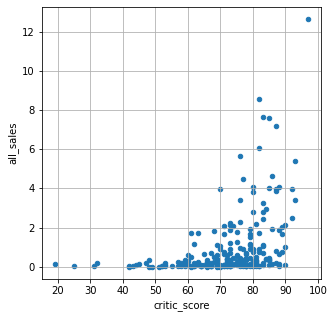

WiiU


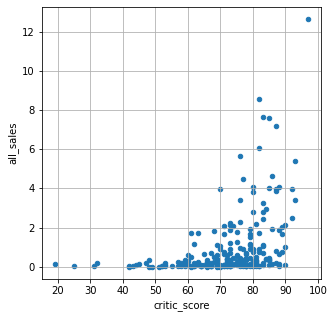

X360


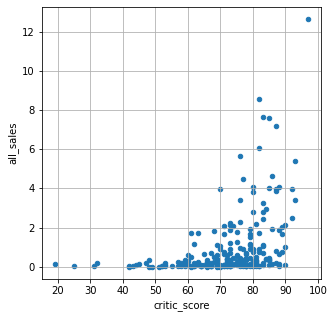

In [43]:
for plat in any_platform:
    print(plat)
    data[data['platform']=='PS4'].plot(x='critic_score', y='all_sales', kind='scatter', figsize=(5,5), grid=True)
    plt.show()


**Вывод:** Судя по коэффициенту корреляции Пирсона видно наличие связи между оценкой критиков и суммарными продажами. В целом можно сказать что суммарая прибыль в определенной степени зависит от оценки критиков, в отличие от оценки пользователей

#### Распределение игр по жанрам

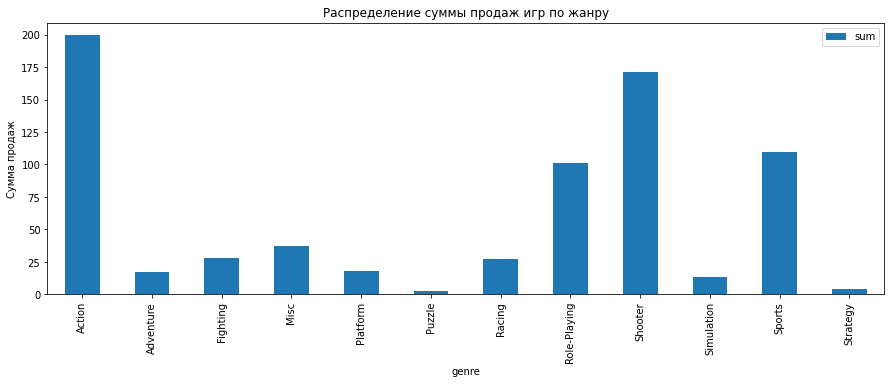

In [44]:
(data.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'sum')
 .rename(columns={'all_sales':'sum'})
).plot(y='sum', kind = 'bar', figsize = (15,5), ylabel = 'Сумма продаж', title = 'Распределение суммы продаж игр по жанру')
plt.show()

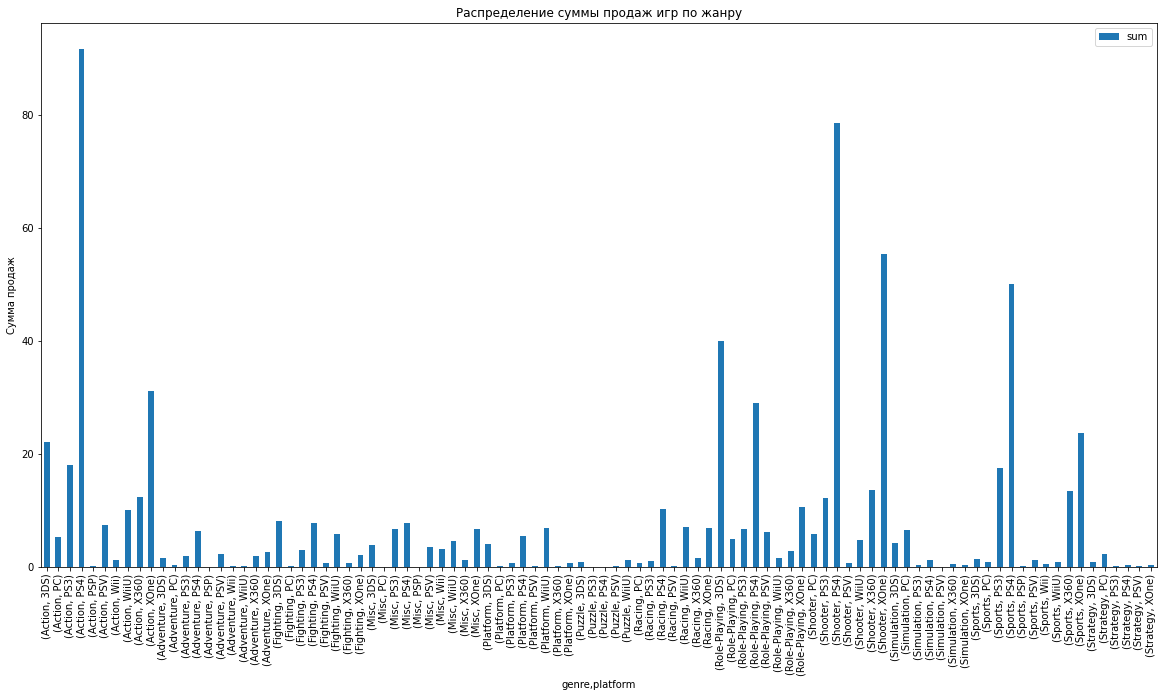

In [45]:
(data.pivot_table(index = ['genre','platform'], values = 'all_sales', aggfunc = 'sum')
 .rename(columns={'all_sales':'sum'})
).plot(y='sum', kind = 'bar', figsize = (20,10), ylabel = 'Сумма продаж', title = 'Распределение суммы продаж игр по жанру')
plt.show()

In [46]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

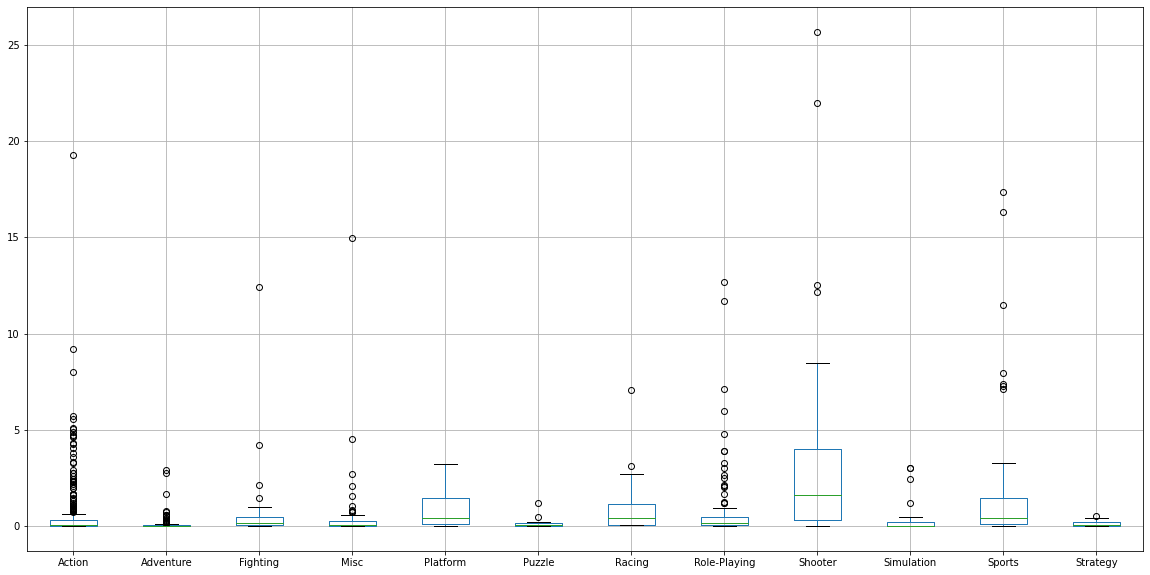

In [47]:
data.pivot_table(index='name', columns='genre', values = 'all_sales', aggfunc= 'sum').boxplot(grid=True, figsize=(20,10))

plt.show()

genre
Action          0.090
Adventure       0.030
Fighting        0.125
Misc            0.090
Platform        0.140
Puzzle          0.045
Racing          0.090
Role-Playing    0.110
Shooter         0.515
Simulation      0.100
Sports          0.180
Strategy        0.060
Name: all_sales, dtype: float64


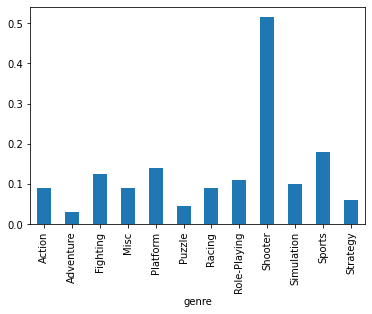

In [48]:
print(data.groupby('genre')['all_sales'].median())
data.groupby('genre')['all_sales'].median().plot.bar()
plt.show()

**Вывод:** Согласно результатам видно, что наиболее выгодным и устойчивым будет выбор в сторону игр жанра Shooter и Sports, самыми же рисковыми к выводу будут игры в жанке Adventure и Puzzle

### Составьте портрет пользователя каждого региона. 

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  all_sales        1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 236.1+ KB


Построим диаграммы распеределения выручки по платформам в разрезе регионов

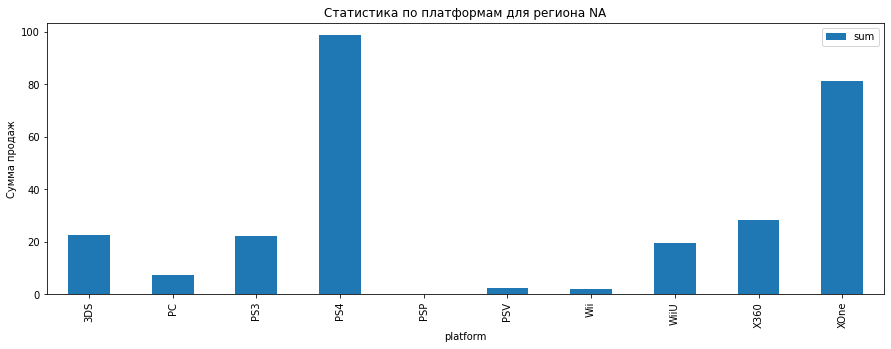

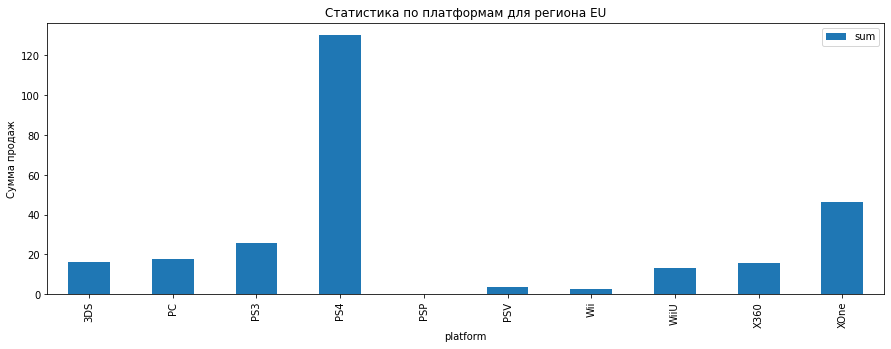

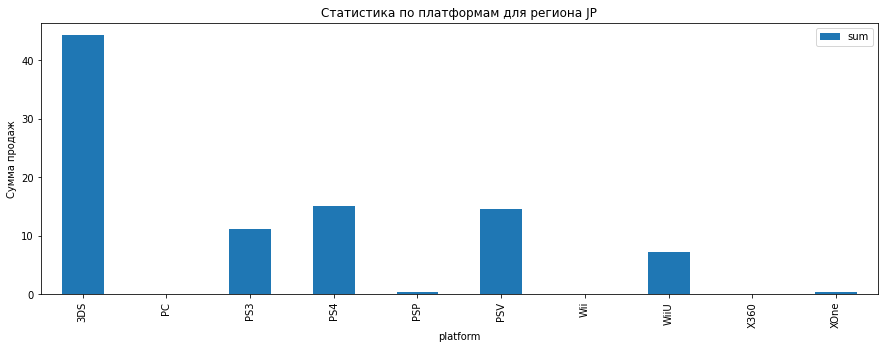

In [50]:
(data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
 .rename(columns={'na_sales':'sum'})
).plot(y='sum', kind = 'bar', figsize = (15,5), ylabel = 'Сумма продаж', title = 'Статистика по платформам для региона NA')
plt.show()
(data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
 .rename(columns={'eu_sales':'sum'})
).plot(y='sum', kind = 'bar', figsize = (15,5), ylabel = 'Сумма продаж', title = 'Статистика по платформам для региона EU')
plt.show()
(data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
 .rename(columns={'jp_sales':'sum'})
).plot(y='sum', kind = 'bar', figsize = (15,5), ylabel = 'Сумма продаж', title = 'Статистика по платформам для региона JP')
plt.show()

In [51]:
print('Статистика по платформам для региона NA')
na = data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
na.columns = ['sum']
print(na.sort_values(by='sum',ascending=False).head(5))
print()
print('Статистика по платформам для региона EU')
eu = data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
eu.columns = ['sum']
print(eu.sort_values(by='sum',ascending=False).head(5))
print()
print('Статистика по платформам для региона JP')
jp = data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
jp.columns = ['sum']
print(jp.sort_values(by='sum',ascending=False).head(5))
print()

Статистика по платформам для региона NA
            sum
platform       
PS4       98.61
XOne      81.27
X360      28.30
3DS       22.64
PS3       22.05

Статистика по платформам для региона EU
             sum
platform        
PS4       130.04
XOne       46.25
PS3        25.54
PC         17.97
3DS        16.12

Статистика по платформам для региона JP
            sum
platform       
3DS       44.24
PS4       15.02
PSV       14.54
PS3       11.22
WiiU       7.31



Статистика по жанрам для регионов

In [52]:
print('Статистика по платформам для региона NA')
na = data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
na.columns = ['sum']
print(na.sort_values(by='sum',ascending=False).head(5))
print()
print('Статистика по платформам для региона EU')
eu = data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
eu.columns = ['sum']
print(eu.sort_values(by='sum',ascending=False).head(5))
print()
print('Статистика по платформам для региона JP')
jp = data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
jp.columns = ['sum']
print(jp.sort_values(by='sum',ascending=False).head(5))
print()

Статистика по платформам для региона NA
                sum
genre              
Shooter       79.02
Action        72.53
Sports        46.13
Role-Playing  33.47
Misc          15.05

Статистика по платформам для региона EU
                sum
genre              
Action        74.68
Shooter       65.52
Sports        45.73
Role-Playing  28.17
Racing        14.13

Статистика по платформам для региона JP
                sum
genre              
Role-Playing  31.16
Action        29.58
Fighting       6.37
Misc           5.61
Shooter        4.87



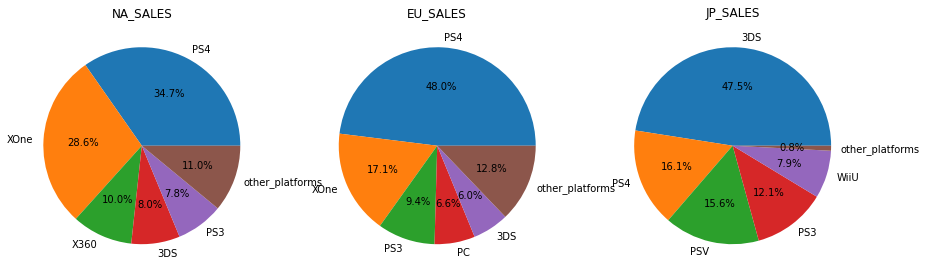

In [53]:
region_sales_list = ['na_sales', 'eu_sales', 'jp_sales']
fig, axs = plt.subplots(1,3,figsize=(15, 15))

for i in range(3):
    
    actual_df = data[data['year_of_release'] >= 2014]
    data_pie = (actual_df
                .groupby('platform')[region_sales_list[i]]
                .sum()
                .reset_index()
                .sort_values(region_sales_list[i], ascending=False, ignore_index=True)
                .head(5)
               )
    data_pie = data_pie.append({'platform':'other_platforms', 
                                region_sales_list[i]:actual_df[region_sales_list[i]].sum() - data_pie[region_sales_list[i]].sum()
                               }, 
                               ignore_index=True
                              )

    axs[i].pie(data_pie[region_sales_list[i]], labels=data_pie['platform'], autopct='%1.1f%%')
 
    axs[i].set_title(data_pie.columns[1].split(' ')[0].upper())
plt.show()

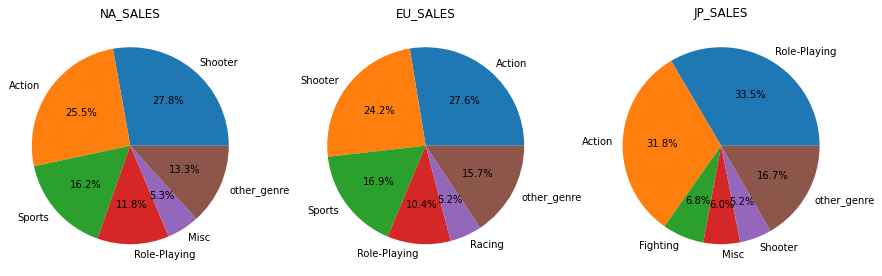

In [54]:
region_sales_list = ['na_sales', 'eu_sales', 'jp_sales']
fig, axs = plt.subplots(1,3,figsize=(15, 15))

for i in range(3):
    
    actual_df = data[data['year_of_release'] >= 2014]
    data_pie = (actual_df
                .groupby('genre')[region_sales_list[i]]
                .sum()
                .reset_index()
                .sort_values(region_sales_list[i], ascending=False, ignore_index=True)
                .head(5)
               )
    data_pie = data_pie.append({'genre':'other_genre', 
                                region_sales_list[i]:actual_df[region_sales_list[i]].sum() - data_pie[region_sales_list[i]].sum()
                               }, 
                               ignore_index=True
                              )

    axs[i].pie(data_pie[region_sales_list[i]], labels=data_pie['genre'], autopct='%1.1f%%')
 
    axs[i].set_title(data_pie.columns[1].split(' ')[0].upper())
plt.show()

In [55]:
print('Статистика по платформам для региона NA')
na_rating = data.pivot_table(index = ['rating'], values = 'na_sales', aggfunc = 'sum')
na_rating.columns = ['sum']
print(na_rating.sort_values(by='sum',ascending=False).head(5))
print()

print('Статистика по платформам для региона EU')
eu_rating = data.pivot_table(index = ['rating'], values = 'eu_sales', aggfunc = 'sum')
eu_rating.columns = ['sum']
print(eu_rating.sort_values(by='sum',ascending=False).head(5))
print()

print('Статистика по платформам для региона JP')
jp_rating = data.pivot_table(index = ['rating'], values = 'jp_sales', aggfunc = 'sum')
jp_rating.columns = ['sum']
print(jp_rating.sort_values(by='sum',ascending=False).head(5))
print()

Статистика по платформам для региона NA
           sum
rating        
M        96.42
NO-INFO  64.72
E        50.74
T        38.95
E10+     33.23

Статистика по платформам для региона EU
           sum
rating        
M        93.44
NO-INFO  58.95
E        58.06
T        34.07
E10+     26.16

Статистика по платформам для региона JP
           sum
rating        
NO-INFO  56.90
T        14.78
E         8.94
M         8.01
E10+      4.46



In [56]:
# Комментарий ревьюера
temp = data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


NO-INFO    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

**Вывод:** Согласно полученным результатам видно, что в регионах NA и EU первые 4 жанра по популярности одинаковые платформы в целом тоже, только в NA больше используют PS3 чем X360, ререгион JP сильно отличается от них как по платформам так и по жанрам, там топовой платформой является 3DS, а жанром Role-Playing, который в других регионах на 4-ом месте.
При добавлении в анализ рейтинга видна зависимость сумм от рейтенга и жанра в связке. рейтинг М самый популярный.

### Проверка гипотез. 

In [57]:
new_data = data.dropna(subset=['user_score']) 
xone = new_data[new_data['platform'] == 'XOne']['user_score']
pc = new_data[new_data['platform'] == 'PC']['user_score']
results = st.ttest_ind(xone, pc, equal_var = False)
 
alpha = .05
 
print(results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
#H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
#H₁: Средние пользовательские рейтинги платформ Xbox One и PC разные

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


In [58]:
new_data = data.dropna(subset=['user_score']) 
action = new_data[new_data['genre'] == 'Action']['user_score']
sports = new_data[new_data['genre'] == 'Sports']['user_score']
results = st.ttest_ind(action, sports, equal_var = False)
 
alpha = .05
 
print(results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
 
 
#H₀: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
#H₁: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

1.1825550382644557e-14
Отвергаем нулевую гипотезу


### Напишите общий вывод. 

В рамках анализы были проделаны следующие основные пункты:
   1. Открытие и получение информации о файле и содержащейся в нем информации;
   2. Выполнена предобработка данных (проверка на дубликаты, проверка пропусков, обработка пропусков и их удаление при возможности)
   3. Смена форматов для части данных
   4. Проанализированны все временные периоды представленные в датасете
   5. Проанализированны все платформы представленные в датасете
   6. Проанализированны все жанры игр представленные в датасете
   7. Для составления прогнозной модели на 2017 год были взяты данные за период 2014-2016 на основе определенного жизненного цикла платформ
   8. Были выявлены наиболее актуальные платформы и жанры игр
   9. Были выявлены наиболее популярные платформы и жанры игр для регионов EU, NA, JP
   10. Были проверены гипотезы по среднепользовательскому рейтингу по платформам и по жанрам

**По итогам выполненного анализа можно дать следующие рекомендации:**
   1. необходимо понимать на какой рынок будет выполнятся продажа/реклама, если рынки EU и NA в целом схожи, то рынок JP координально отличается как по жанрам востребованных игр, так и по платформам на которых эти игры запускаются.
   2. Стоит учитывать что рейтинги игр на разных платформах могут быть разные, необходимо для каждой платформы выбирать наиболее подходящюю игру и жанр
   3. Стоит учитывать, что для каждого жанра рейтинг тоже разный, но при этом нужно учитывать что общая возможная прибыль не зависит от оценок пользователей.
   4. Самое выгодное направление это игры в жанре шктеров и экшен, необходимо учитывать что на возможную сумму прибыли будут и могут влиять оценки еритиков, для стран европы и сев. америки наиболее популярны игры с возрастным рейтингом "Для взрослых", которые не оценены по ESRB и с рейтингом для всех.
   5. На текущий момент самыми актуальными платформами являютмя PS4 и XOne для азиатского региона Wii.
